In [1]:
vical <- read.table("../Data/7_overall_summary/Vical_summary.csv", sep="\t", header=T)
raw <- read.table("../Data/7_overall_summary/Raw_summary.csv",  sep="\t", header=T)
fil <- read.table("../Data/7_overall_summary/Fil_summary.csv", sep="\t", header=T)

In [2]:
library(reshape2)
melt_vical <- melt(vical, id.vars=c("X"))
melt_raw <- melt(raw, id.vars=c("X"))
melt_fil <- melt(fil, id.vars=c("X"))

In [3]:
library(dplyr)
library(tidyr)

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘tidyr’ was built under R version 3.4.4”
Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths



In [4]:
melt_vical <- melt_vical %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))
melt_raw <- melt_raw %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))
melt_fil <- melt_fil %>% separate(variable, 
                c("Sample_Type", "Wavelength","mean_or_sd"))

In [5]:
shaped_vical <- dcast(melt_vical, X+Wavelength~Sample_Type+mean_or_sd)
shaped_raw <- dcast(melt_raw, X+Wavelength~Sample_Type+mean_or_sd)
shaped_fil <- dcast(melt_fil, X+Wavelength~Sample_Type+mean_or_sd)

In [6]:
library(ggplot2)
theme_set(theme_classic())


Attaching package: ‘ggplot2’

The following object is masked from ‘package:dplyr’:

    vars



In [9]:
shaped_vical[shaped_vical$b_mean<=0,]

,X,Wavelength,a_mean,a_std,b_mean,b_std,c_mean,c_std
64,y20,412,0.8206338,0.1490430,-0.41575443,0.3531814,1.2255132,0.3201926
65,y20,440,0.6146206,0.1448506,-0.22471767,0.3462985,1.0045235,0.3145489
66,y20,488,0.4159011,0.1353657,-0.03438499,0.3341395,0.7974172,0.3054919


### Vicariously calibrated

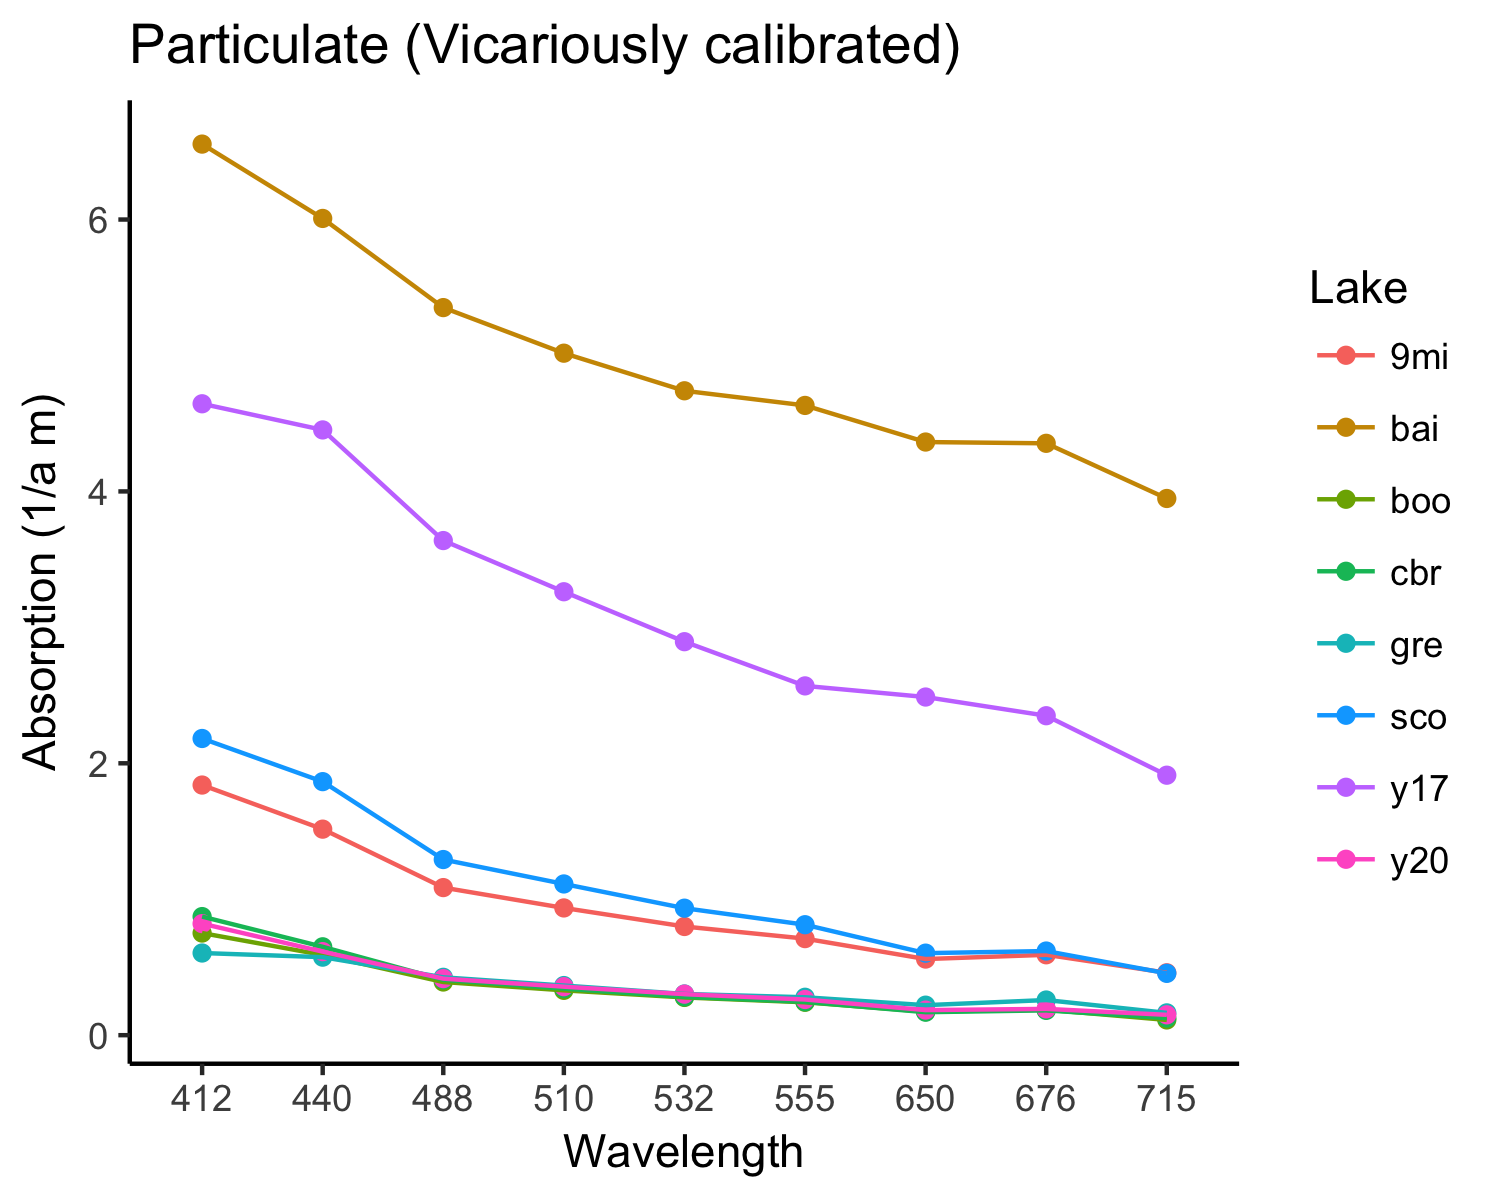

In [10]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 300)
ggplot(shaped_vical, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Particulate (Vicariously calibrated)")

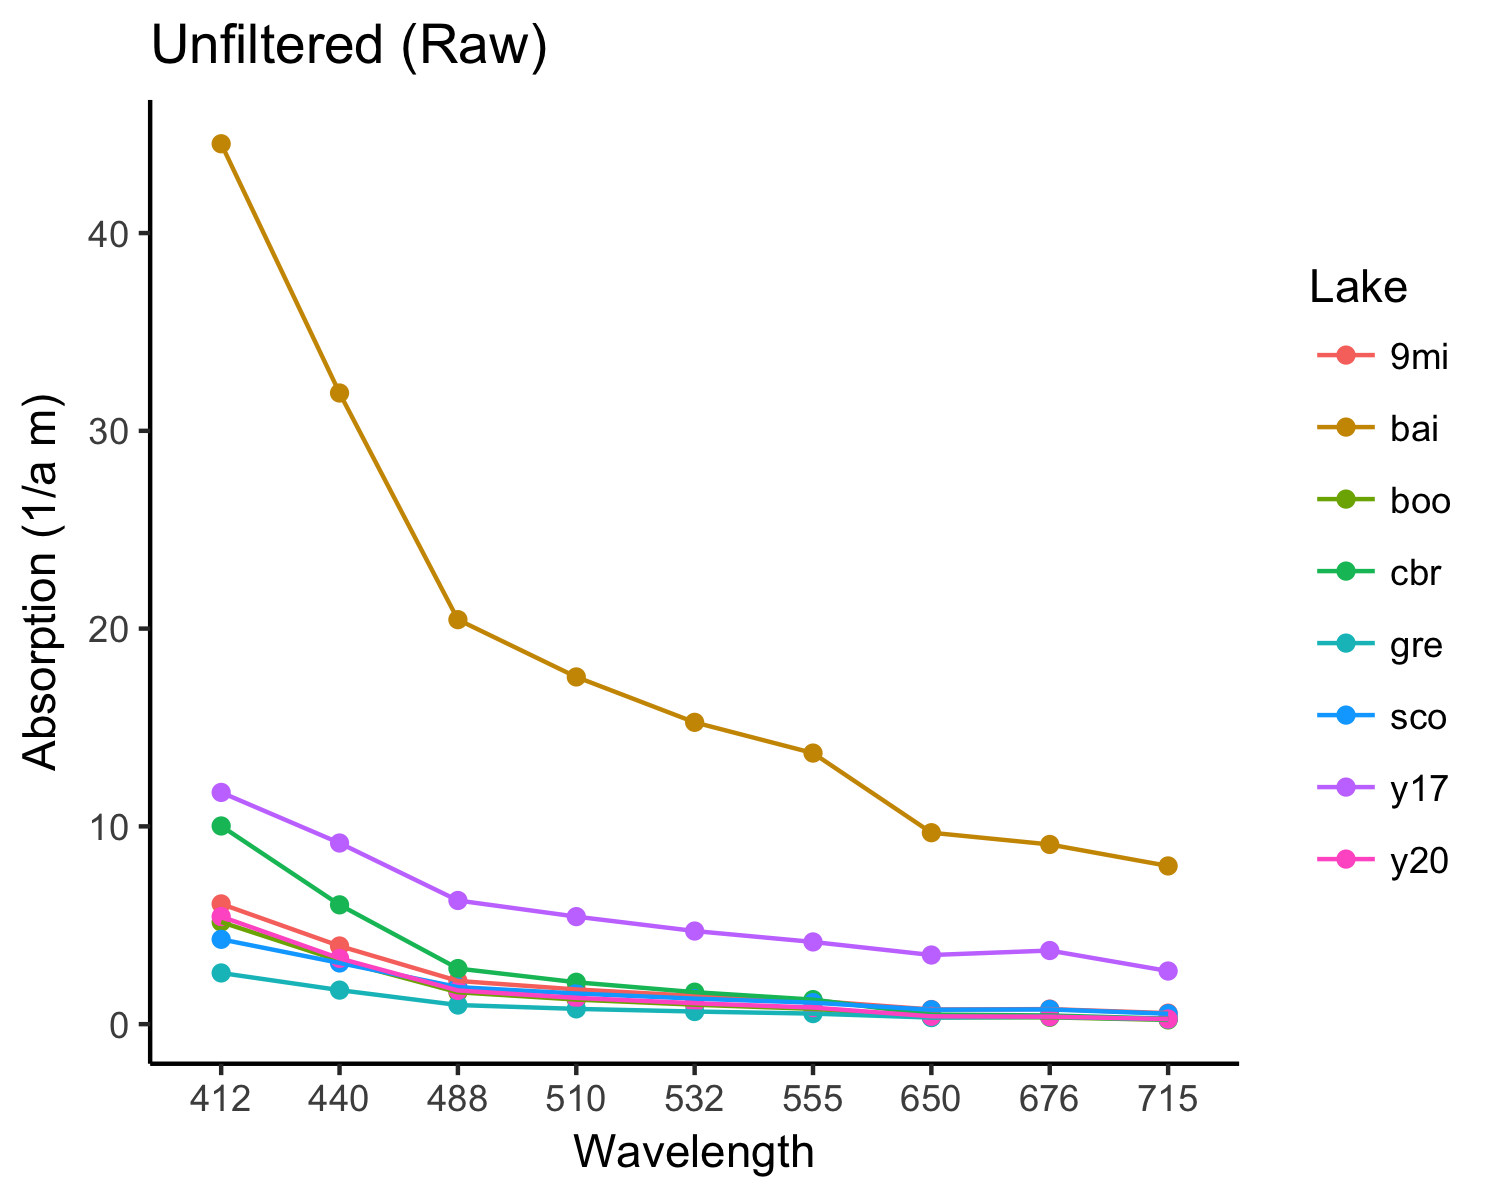

In [11]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 300)
ggplot(shaped_raw, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Unfiltered (Raw)")

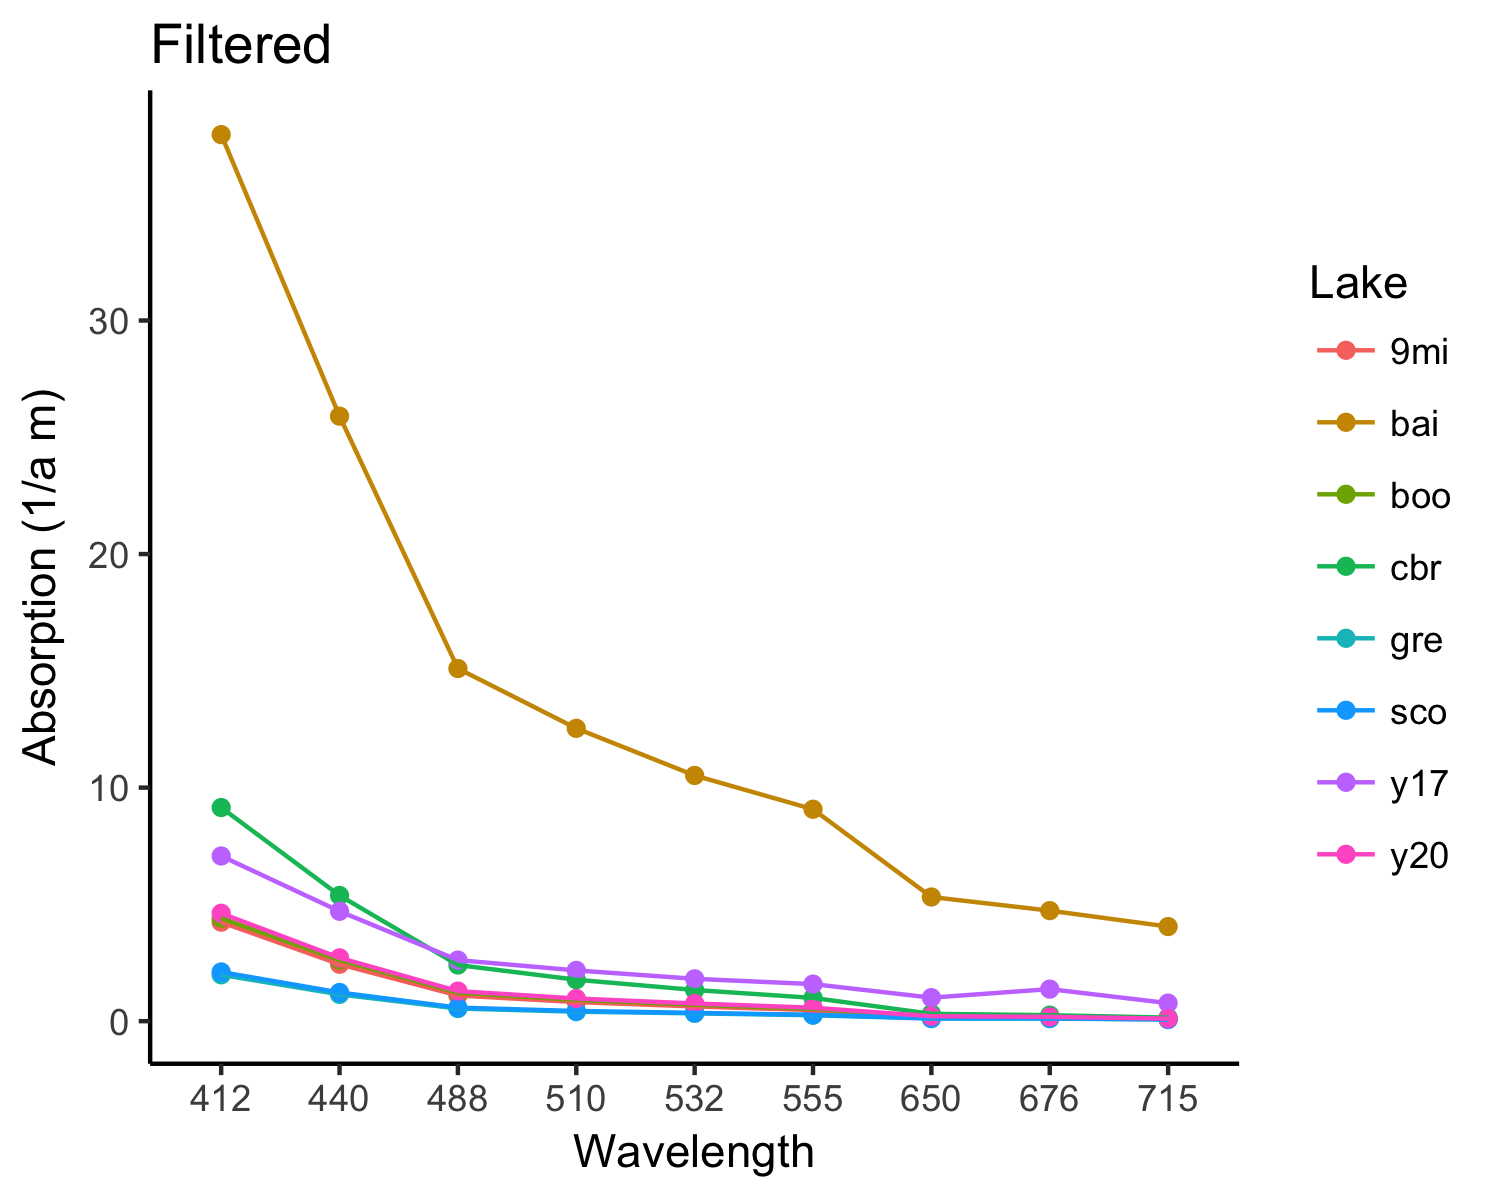

In [12]:
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 300)
ggplot(shaped_fil, aes(x=Wavelength, y=a_mean, group=X, color=X)) +
    geom_point() +
    geom_line() +
    labs(color="Lake",y="Absorption (1/a m)", title="Filtered")